In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('online_retail.csv', delimiter = ';')
df

,InvoiceNo,Description
0,C536383,SET OF 3 COLOURED FLYING DUCKS
1,C536391,PLASTERS IN TIN CIRCUS PARADE
2,C536391,PACK OF 12 PINK PAISLEY TISSUES
3,C536391,PACK OF 12 BLUE PAISLEY TISSUES
4,C536391,PACK OF 12 RED RETROSPOT TISSUES
...,...,...
9206,C581490,ZINC T-LIGHT HOLDER STARS SMALL
9207,C581499,Manual
9208,C581568,VICTORIAN SEWING BOX LARGE
9209,C581569,HANGING HEART JAR T-LIGHT HOLDER


In [3]:
agrupado = df.groupby('InvoiceNo')['Description'].apply(','.join).reset_index()
agrupado['Description'] = agrupado['Description'].str.replace(' ,', ',')
agrupado = agrupado.Description.str.split(',',expand = True)
agrupado.head(10)
agrupado.to_csv("transaction.csv", index = False, header = False, sep = ',')

In [4]:
df = pd.read_csv('transaction.csv', delimiter = ',', header = None)
df.replace(np.nan, 0, inplace=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,SET OF 3 COLOURED FLYING DUCKS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PLASTERS IN TIN CIRCUS PARADE,PACK OF 12 PINK PAISLEY TISSUES,PACK OF 12 BLUE PAISLEY TISSUES,PACK OF 12 RED RETROSPOT TISSUES,CHICK GREY HOT WATER BOTTLE,PLASTERS IN TIN VINTAGE PAISLEY,PLASTERS IN TIN SKULLS,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,JAM MAKING SET WITH JARS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HAND WARMER RED RETROSPOT,CHARLOTTE BAG SUKI DESIGN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 HOOK HANGER MAGIC GARDEN,5 HOOK HANGER MAGIC TOADSTOOL,SET/5 RED RETROSPOT LID GLASS BOWLS,SET OF SALT AND PEPPER TOADSTOOLS,DELUXE SEWING KIT,TRIPLE PHOTO FRAME CORNICE,RETROSPOT PARTY BAG + STICKER SET,HOOK,1 HANGER,MAGIC GARDEN,...,0,0,0,0,0,0,0,0,0,0
5,SET/5 RED RETROSPOT LID GLASS BOWLS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SET 7 BABUSHKA NESTING BOXES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 TIER CAKE TIN GREEN AND CREAM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,MIRRORED DISCO BALL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LIGHT GARLAND BUTTERFILES PINK,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def removeZeros(lista):
    return list(filter(lambda x: x != 0, lista))

In [6]:
listao = []
for index, product in df.iterrows():
    lista = product.values.tolist()
    lista = removeZeros(lista)
    listao.append(lista)

listao[0:3]

[['SET OF 3 COLOURED  FLYING DUCKS'],
 ['PLASTERS IN TIN CIRCUS PARADE',
  'PACK OF 12 PINK PAISLEY TISSUES',
  'PACK OF 12 BLUE PAISLEY TISSUES',
  'PACK OF 12 RED RETROSPOT TISSUES',
  'CHICK GREY HOT WATER BOTTLE',
  'PLASTERS IN TIN VINTAGE PAISLEY',
  'PLASTERS IN TIN SKULLS'],
 ['JAM MAKING SET WITH JARS']]

In [7]:
TE = TransactionEncoder()
TE_AR = TE.fit(listao).transform(listao)

In [8]:
df = pd.DataFrame(TE_AR, columns =TE.columns_)
df.head(10)

,,1 HANGER,50'S CHRISTMAS GIFT BAG LARGE,BACK DOOR,BIRTHDAY CARD,BREAKFAST IN BED,DOLLY GIRL BEAKER,FRONT DOOR,GARAGE DESIGN,GLASS DOORS,...,ZINC FOLKART SLEIGH BELLS,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,pack/12
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
valores_k = []
S = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(df)
    valores_k.append(i)
    S.append(metrics.silhouette_score(df, kmeans.labels_))

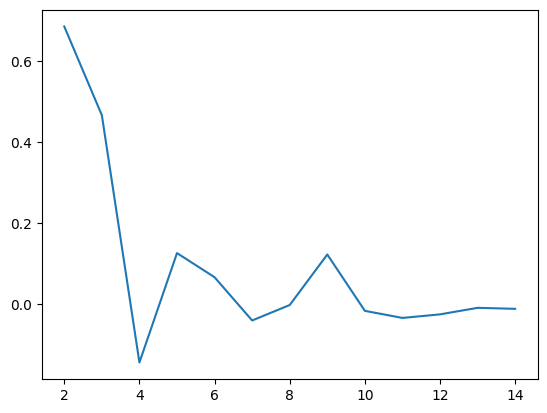

In [10]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(df)
df['Cluster'] = kmeans.labels_
df.to_csv('AGRUPADO.csv', index = False, header = False, sep = ',')

In [12]:
dfasscoc = df.drop('Cluster', axis=1)
dfasscoc.head(10)

,,1 HANGER,50'S CHRISTMAS GIFT BAG LARGE,BACK DOOR,BIRTHDAY CARD,BREAKFAST IN BED,DOLLY GIRL BEAKER,FRONT DOOR,GARAGE DESIGN,GLASS DOORS,...,ZINC FOLKART SLEIGH BELLS,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,pack/12
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
freq_itemset = apriori(df, min_support= 0.001, use_colnames=True)
freq_itemset.sort_values(by=['support'], ascending= False).head(50)

c:\Users\erikp\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [ ]:
regras = association_rules(freq_itemset, metric = 'confidence', min_threshold = 0.4)
# regras.sort_values(by= 'lift', ascending = False)
regras.sort_values(by= 'confidence', ascending = False).drop(columns=['antecedent support', 'consequent support', 'leverage', 'zhangs_metric'], axis = 1) 